# Create a gif for spots in Molecular Cartography images (or any other FISH based technology)

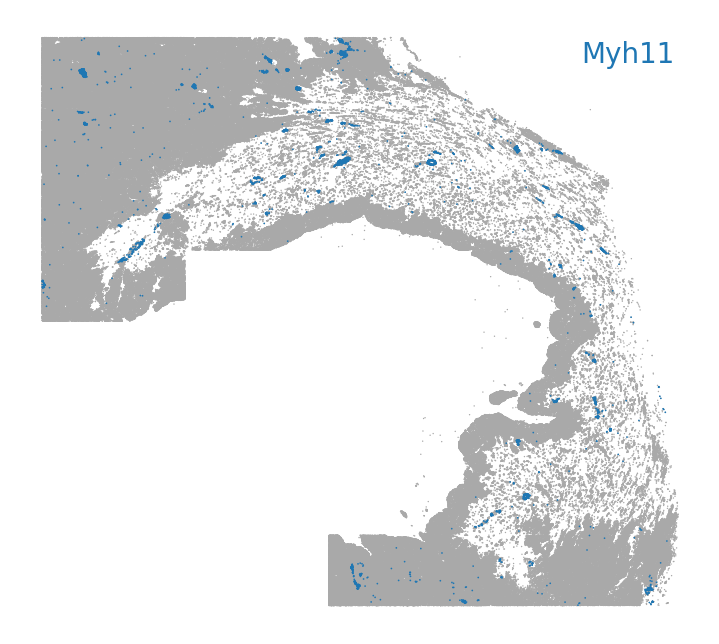

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Read in the CSV file
# Name columns x,y,z,gene
df = pd.read_csv('/Users/florian_wuennemann/1_Projects/MI_project/synapse_data/mi_resolve/sample_4h_r1_s1.spots.tsv', 
                 sep='\t', header=0,
                 names=['x', 'y', 'z', 'gene'])

# Set up the plot
fig, ax = plt.subplots(figsize=(7, 7 / (df['x'].max() - df['x'].min()) * (df['y'].max() - df['y'].min())), frameon=False)  # Reduce the size of the plot
ax.set_xlim(df['x'].min(), df['x'].max())
ax.set_ylim(df['y'].max(), df['y'].min())  # Reverse the order of the y-limits
# set figure background opacity (alpha) to 0
fig.patch.set_alpha(0.0)

# Remove the axis and ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Reduce the margins
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Flip the y-axis upside down
ax.invert_yaxis()

genes = ["Myh11","Npr3","Pln","Nppa","Aqp1","Pecam1","Col1a1","Ccl2","Ccr2","Tagln","Cd74", "Il6","Il1b"]
# genes = df['gene'].unique() ## This would use all genes but makes the file really big and takes really long!
# subset df for genes 
df = df[df['gene'].isin(genes)]

# Define a function to update the plot for each frame of the animation
def update(frame):
    # Clear the plot
    ax.clear()
    
    # Get the gene for this frame
    gene = genes[frame]
    
    # Plot all the data in dark grey
    ax.scatter(df['x'], df['y'], color='darkgrey', s=1, edgecolor='none', linewidth=0)
    
    # Subset the data for this gene
    data = df[df['gene'] == gene]
    
    # Define the four colors with the best contrast to dark grey and white
    colors = ['#1f77b4', '#6a3d9a', '#2ca02c', '#d62728']
    
    # Plot the data for this gene using the four colors
    color = colors[frame % len(colors)]
    ax.scatter(data['x'], data['y'], color=color, s=1.5, edgecolor='none', linewidth=0)
    
    # Flip the y-axis upside down
    ax.invert_yaxis()
    
    # Add the gene name in the top right corner
    # Increase the size of the text
    ax.text(0.95, 0.95, gene, transform=ax.transAxes, ha='right', va='top', color=color, fontsize=20)

# Create the animation
# Make the speed of the animation slower
anim = FuncAnimation(fig, update, frames=len(genes), repeat=True, interval=750)

# Show the animation
anim.save('animation.gif', codec="png",dpi=300, bitrate=-1, savefig_kwargs={"transparent": True, "facecolor": "none"},)